In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import the necessary libraries

In [2]:
#import the dataset to my IDE
data = pd.read_csv(r"C:\Users\ABBA\Downloads\covid 19\covid_19_clean_complete.csv")

upload the data set and save it in a variable call data

Data Preprocessing

In [3]:
#checking the first 5 rows of the dataset
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


checking the first five entries in the dataset

In [4]:
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


checking on the last five entries in the dataset

In [5]:
#checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


these shows the range of the entries in the dataset starting from 0 to 49067 and shows the number of columns and the data type of each column

In [6]:
#checking for missing values
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

these shows that there is no any missing value except in the column "Province/State" which have 34404 missing values

In [7]:
#checking for duplicates 
data.duplicated().sum()

0

these shows that there is no any duplicates in the data

Exploratory Data Analysis (EDA)

In [8]:
# checking for garbage Value
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("***"*10)

Province/State
Australian Capital Territory    188
Yunnan                          188
Mayotte                         188
Guadeloupe                      188
French Polynesia                188
                               ... 
Guizhou                         188
Guangxi                         188
Guangdong                       188
Gansu                           188
Saint Pierre and Miquelon       188
Name: count, Length: 78, dtype: int64
******************************
Country/Region
China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: count, Length: 187, dtype: int64
******************************
Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    2

these shows that there is no any garbage in the data

In [9]:
#checking the statistics of the numercal data
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


these shows that the number of entries, mean, standard deviation, minimun value, 25% quartile, 50% quartile, 75% quartile and maximun value of each numerical columns

In [10]:
#checking the statistics of non-numerical data
data.describe(include="object")

,Province/State,Country/Region,Date,WHO Region
count,14664,49068,49068,49068
unique,78,187,188,6
top,Australian Capital Territory,China,2020-01-22,Europe
freq,188,6204,261,15040


These shows the number of entries, unique, frequency and top of each non numerical columns

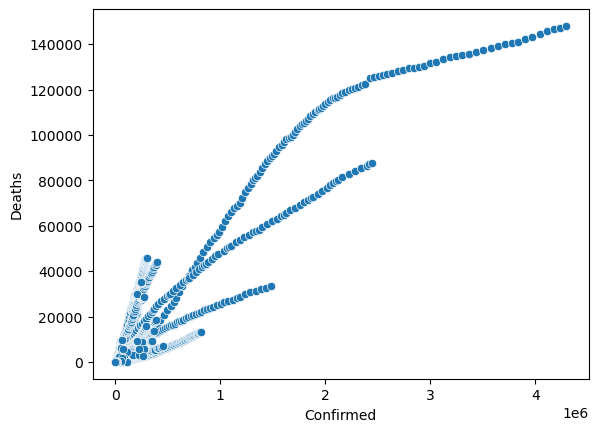

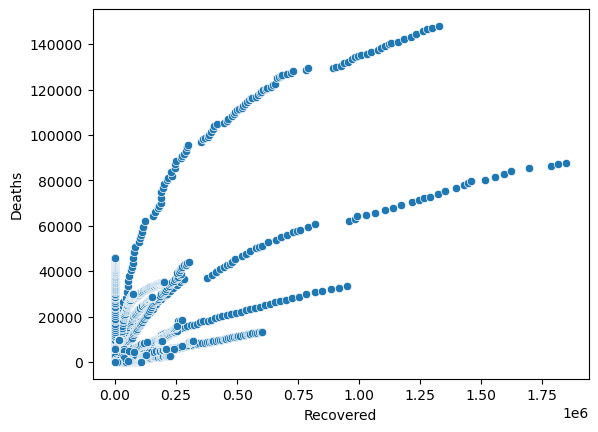

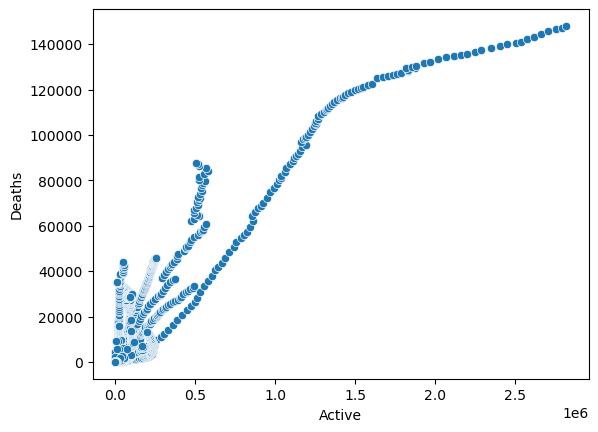

In [11]:
#using scatter plot to check the relationship between data
for i in['Confirmed', 'Recovered', 'Active']:
    sns.scatterplot(data=data,x=i,y='Deaths')
    plt.show()

These shows the relationship between Deaths columns and Comfirmed, Recoverved, Active data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


<Axes: >

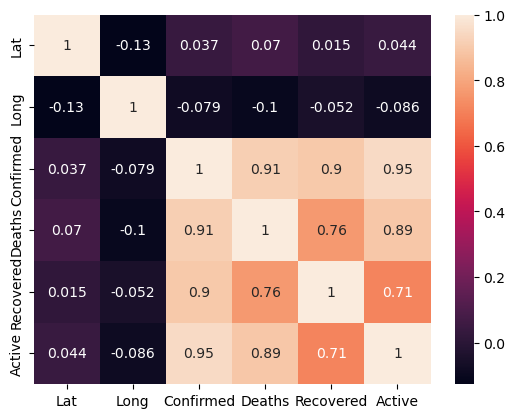

In [19]:
#checking the correlation of the features using heatmap

heatmap=data.select_dtypes(include="number").corr()
sns.heatmap(heatmap,annot=True)

Model Development

In [20]:
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing
# Create a binary target variable: "High Risk" if deaths > 100, else "Low Risk"
data['Risk_Level'] = ['High Risk' if x > 100 else 'Low Risk' for x in data['Deaths']]

# Encode categorical variables
label_encoder = LabelEncoder()
data['WHO Region Encoded'] = label_encoder.fit_transform(data['WHO Region'])

# Select features and target variable
features = ['Confirmed', 'Recovered', 'Active', 'WHO Region Encoded']
target = 'Risk_Level'

# Split data into training and testing sets
X = data[features]
y = data[target]
y = label_encoder.fit_transform(y)  # Encode target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9781527675878373
              precision    recall  f1-score   support

   High Risk       0.93      0.95      0.94      2111
    Low Risk       0.99      0.99      0.99     10156

    accuracy                           0.98     12267
   macro avg       0.96      0.97      0.96     12267
weighted avg       0.98      0.98      0.98     12267

